In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ProductReviews.csv to ProductReviews.csv


**Import Dataset**

In [ ]:
import pandas as pd

data = pd.read_csv("ProductReviews.csv")
data.head()


,product_id,review_id,review_type,product_name,product_rating,review_rating,rating_count,description,url
0,B0D1XD1ZV3,RB47WOU0Q32Y5,Critical,"Apple AirPods Pro 2 Wireless Earbuds, Bluetoot...",4.6,5.0,"8,848",I've owned multiple pairs of AirPods over the ...,https://www.amazon.com/Apple-Cancellation-Tran...
1,B0D1XD1ZV3,R3H55DLDY8DCXL,Critical,"Apple AirPods Pro 2 Wireless Earbuds, Bluetoot...",4.6,5.0,"8,848","First, please comment if you have any question...",https://www.amazon.com/Apple-Cancellation-Tran...
2,B0D1XD1ZV3,R3T13FTQP0PE2B,Critical,"Apple AirPods Pro 2 Wireless Earbuds, Bluetoot...",4.6,5.0,"8,848","I've owned all versions of airpods, normal, pr...",https://www.amazon.com/Apple-Cancellation-Tran...
3,B0D1XD1ZV3,RAX4TCFSYWT4,Critical,"Apple AirPods Pro 2 Wireless Earbuds, Bluetoot...",4.6,5.0,"8,848",Purchased Airpods Pro 2 with USB-C on Amazon. ...,https://www.amazon.com/Apple-Cancellation-Tran...
4,B0D1XD1ZV3,R2UOXE18J8NJLM,Critical,"Apple AirPods Pro 2 Wireless Earbuds, Bluetoot...",4.6,5.0,"8,848",The Apple AirPods Pro 2 are simply exceptional...,https://www.amazon.com/Apple-Cancellation-Tran...


In [ ]:
data['sentiment_binary'] = df['review_type'].map({'Positive': 1, 'Critical': 0})

# Display the first few rows to verify
print(data[['review_type', 'sentiment_binary']].head(20))

   review_type  sentiment_binary
0     Critical                 0
1     Critical                 0
2     Critical                 0
3     Critical                 0
4     Critical                 0
5     Critical                 0
6     Critical                 0
7     Critical                 0
8     Critical                 0
9     Critical                 0
10    Positive                 1
11    Positive                 1
12    Positive                 1
13    Positive                 1
14    Positive                 1
15    Positive                 1
16    Positive                 1
17    Positive                 1
18    Positive                 1
19    Positive                 1


In [ ]:
mydata = data[['description','sentiment_binary']]
mydata.columns = ['review','label']

mydata.head()

,review,label
0,I've owned multiple pairs of AirPods over the ...,0
1,"First, please comment if you have any question...",0
2,"I've owned all versions of airpods, normal, pr...",0
3,Purchased Airpods Pro 2 with USB-C on Amazon. ...,0
4,The Apple AirPods Pro 2 are simply exceptional...,0


In [ ]:
mydata.value_counts('label')

,count
label,
1,1579
0,1319


In [ ]:
# Count the occurrences of each label
label_counts = mydata["label"].value_counts()

# Get the number of rows to drop from the majority class
rows_to_drop = label_counts.max() - label_counts.min()

# Drop rows from the majority class randomly
if rows_to_drop > 0:
   data_majority = mydata[mydata["label"] == 1]
   data_balanced = mydata.drop(data_majority.sample(rows_to_drop).index)
else:
   data_balanced = mydata.copy()

# Check the new class balance
print(data_balanced["label"].value_counts())

label
0    1319
1    1319
Name: count, dtype: int64


**Data Preprocessing**

In [ ]:
import re

def clean_text(text):
    if not isinstance(text, str):  # Convert non-string values to an empty string
        return ""
    # Remove special characters and punctuation
    text = re.sub(r"[^\w\s]", " ", text)
    # Remove single characters
    text = re.sub(r"\b[a-zA-Z]\b", " ", text)
    return text

# Ensure all reviews are strings before cleaning
reviews = data_balanced['review'].astype(str).tolist()

# Clean the text
cleaned_reviews = [clean_text(review) for review in reviews]

# Add the cleaned reviews as a new column
data_balanced['clean_reviews'] = cleaned_reviews

# Verify the changes
print(data_balanced[['review', 'clean_reviews']].head())


                                              review  \
0  I've owned multiple pairs of AirPods over the ...   
1  First, please comment if you have any question...   
2  I've owned all versions of airpods, normal, pr...   
3  Purchased Airpods Pro 2 with USB-C on Amazon. ...   
4  The Apple AirPods Pro 2 are simply exceptional...   

                                       clean_reviews  
0    ve owned multiple pairs of AirPods over the ...  
1  First  please comment if you have any question...  
2    ve owned all versions of airpods  normal  pr...  
3  Purchased Airpods Pro 2 with USB   on Amazon  ...  
4  The Apple AirPods Pro 2 are simply exceptional...  


**Data Split**

In [ ]:
import pandas as pd

# Assuming your DataFrame is called "df"
total_rows = len(data_balanced)
test_size = int(total_rows * 0.95)

# Randomly sample train_size rows for the training set
test_set = data_balanced.sample(test_size)

# Get the remaining rows for the test set
train_set = data_balanced.drop(test_set.index)

Sentiment Analysis with Large Language Model(LLM)

Setting up Gemini API

In [ ]:
!pip install -q -U google-generativeai

In [ ]:
# Necessary packages
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

# Used to securely store your API key
from google.colab import userdata

In [ ]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/learnlm-1.5-pro-experimental


In [ ]:
model = genai.GenerativeModel('gemini-2.0-flash')

In [ ]:
%%time
response = model.generate_content("What is the meaning of life?")

to_markdown(response.text)

CPU times: user 109 ms, sys: 15.8 ms, total: 125 ms
Wall time: 11.6 s


> Ah, the million-dollar question! The meaning of life is one of those questions that has plagued philosophers, theologians, and everyday people for centuries. There's no single, universally accepted answer, and that's kind of the point. Here's a breakdown of different perspectives:
> 
> **1. The Absurdist View:**
> 
> *   **Core Idea:** Life is inherently without meaning or purpose. We are born into a chaotic and indifferent universe, and any attempt to find inherent meaning is ultimately futile.
> *   **Implication:** This doesn't necessarily lead to despair. Instead, absurdists encourage embracing the freedom to create your own meaning, rebel against the absurdity, and find joy in the present moment.
> *   **Key Thinkers:** Albert Camus, Jean-Paul Sartre
> 
> **2. The Nihilist View:**
> 
> *   **Core Idea:** Life is meaningless, and there are no objective values or morals. There is no inherent right or wrong, and existence is ultimately pointless.
> *   **Implication:** This view often leads to pessimism and a rejection of traditional values. It can be seen as a more extreme version of absurdism, with less emphasis on creating personal meaning.
> *   **Key Thinkers:** Friedrich Nietzsche (though he also offered potential solutions to nihilism), some interpretations of Arthur Schopenhauer
> 
> **3. The Existentialist View:**
> 
> *   **Core Idea:** Existence precedes essence. We are born into the world without a pre-defined purpose, and it is up to us to create our own meaning through our choices and actions.
> *   **Implication:** This places a strong emphasis on personal responsibility and freedom. We are condemned to be free, meaning we are responsible for the meaning we create.
> *   **Key Thinkers:** Jean-Paul Sartre, Simone de Beauvoir, Albert Camus (overlaps with absurdism)
> 
> **4. The Religious/Spiritual View:**
> 
> *   **Core Idea:** Life has a divinely ordained purpose, often involving serving a higher power, following religious doctrines, and striving for spiritual enlightenment or union with the divine.
> *   **Implication:** This view provides a sense of comfort and purpose, offering a framework for understanding our place in the universe and providing guidelines for moral behavior.
> *   **Examples:** Christianity (serving God and achieving salvation), Buddhism (achieving enlightenment and liberation from suffering), Islam (submission to Allah and following the teachings of the Quran)
> 
> **5. The Humanistic View:**
> 
> *   **Core Idea:** Meaning is found in human connection, personal growth, contributing to society, and pursuing knowledge and understanding.
> *   **Implication:** This view emphasizes the importance of compassion, empathy, and working towards a better world for all. It often focuses on the potential of human beings and the importance of reason and ethics.
> *   **Key Thinkers:** Abraham Maslow, Carl Rogers
> 
> **6. The Hedonistic View:**
> 
> *   **Core Idea:** The meaning of life is to maximize pleasure and minimize pain.
> *   **Implication:** This view can range from simple enjoyment of life's pleasures to a more calculated pursuit of long-term happiness and fulfillment.
> *   **Key Thinkers:** Aristippus of Cyrene, Epicurus
> 
> **7. The Stoic View:**
> 
> *   **Core Idea:** The meaning of life is to live in accordance with nature and virtue, accepting what we cannot control and focusing on what we can.
> *   **Implication:** This emphasizes inner peace, resilience, and living a life of reason and self-control.
> *   **Key Thinkers:** Marcus Aurelius, Epictetus, Seneca
> 
> **8. The Biological/Evolutionary View:**
> 
> *   **Core Idea:** Life's purpose, from a purely biological standpoint, is survival and reproduction, ensuring the continuation of the species.
> *   **Implication:** This view can be seen as reductionist, as it doesn't address the subjective experience of meaning. However, it provides a fundamental understanding of our biological drives.
> 
> **Beyond these philosophical perspectives, the meaning of life can also be found in:**
> 
> *   **Relationships:** Connecting with loved ones, building meaningful relationships, and contributing to the lives of others.
> *   **Purposeful Activity:** Engaging in work, hobbies, or projects that provide a sense of accomplishment and fulfillment.
> *   **Experiences:** Exploring the world, learning new things, and embracing new challenges.
> *   **Creativity:** Expressing oneself through art, music, writing, or other creative endeavors.
> *   **Growth:** Continuously learning, evolving, and becoming a better version of oneself.
> 
> **So, what's the "right" answer?**
> 
> Ultimately, the meaning of life is subjective and personal. What gives your life meaning is up to you to decide. It might be a combination of different perspectives, or something entirely unique to your own experience.
> 
> **Here are some questions to consider when exploring your own meaning:**
> 
> *   What are you passionate about?
> *   What do you value most?
> *   What makes you feel alive and fulfilled?
> *   What kind of impact do you want to have on the world?
> *   What brings you joy and satisfaction?
> 
> Instead of searching for a definitive answer, the journey of exploring the meaning of life can be a valuable and enriching experience in itself. It's about creating a life that feels meaningful *to you*. Good luck on your search!


**Single API call**

In [ ]:
test_set_sample = test_set.sample(20)

test_set_sample['pred_label'] = ''

test_set_sample

,review,label,clean_reviews,pred_label
2110,"Sure, it's a fine TV for 2023-2024. That said...",0,Sure it fine TV for 2023 2024 That said...,
362,Purchased in June 2024.The Express 4K+ player ...,1,Purchased in June 2024 The Express 4K player ...,
1747,I wanted to share my thoughts on the new digit...,1,wanted to share my thoughts on the new digit...,
2078,Works how it’s supposed to. No issues.,1,Works how it supposed to No issues,
1699,The product works fine. The cord is too stiff ...,0,The product works fine The cord is too stiff ...,
781,"The quality of the speaker is great, very eleg...",0,The quality of the speaker is great very eleg...,
2775,"They are pricey, but seem to be of good qualit...",1,They are pricey but seem to be of good qualit...,
857,This is a review for the Yaber T2 Outdoor Proj...,0,This is review for the Yaber T2 Outdoor Proj...,
825,We bought these for school work. I've always l...,1,We bought these for school work ve always l...,
1578,So here is the problem that no one seems to be...,0,So here is the problem that no one seems to be...,


In [ ]:
# Convert the DataFrame to JSON using the to_json() method

json_data = test_set_sample[['clean_reviews','pred_label']].to_json(orient='records')

# Print the JSON data
print(json_data)

[{"clean_reviews":"Sure  it     fine TV for 2023 2024   That said  there   something amiss with the WiFi  and it just randomly disconnects   That wouldn   be so bad  but as noted  we are in 2024 as of this writing  and everything is WiFi  It   beyond frustrating that it won   stay connected   Even worse  the updates are pushed on you  and Google TV is awful to navigate  especially if you want to use something that they decided to bury in   sub menu of   sub menu  looking for you  Google Play Store App  Presumably someone else at or around this price point has working hardware and less awful software ","pred_label":""},{"clean_reviews":"Purchased in June 2024 The Express 4K  player is good  fast and responsive and the YouTube Roku app works well  The main reason   purchased this Express 4K  player was to replace   10 year old Roku 3 which had trouble with its YouTube app  and   few other apps that apparently were becoming Roku 3 incompatible  The Express 4K  voice control remote has loc

In [ ]:
prompt = f"""
You are an expert linguist, who is good at classifying customer review sentiments into Positive/Negative labels.
Help me classify customer reviews into: Positive(label=1), and Negative(label=0).
Customer reviews are provided between three back ticks.
In your output, only return the Json code back as output - which is provided between three backticks.
Your task is to update predicted labels under 'pred_label' in the Json code.
Don't make any changes to Json code format, please.

```
{json_data}
```
"""

print(prompt)




You are an expert linguist, who is good at classifying customer review sentiments into Positive/Negative labels.
Help me classify customer reviews into: Positive(label=1), and Negative(label=0).
Customer reviews are provided between three back ticks.
In your output, only return the Json code back as output - which is provided between three backticks.
Your task is to update predicted labels under 'pred_label' in the Json code.
Don't make any changes to Json code format, please.

```
[{"clean_reviews":"Sure  it     fine TV for 2023 2024   That said  there   something amiss with the WiFi  and it just randomly disconnects   That wouldn   be so bad  but as noted  we are in 2024 as of this writing  and everything is WiFi  It   beyond frustrating that it won   stay connected   Even worse  the updates are pushed on you  and Google TV is awful to navigate  especially if you want to use something that they decided to bury in   sub menu of   sub menu  looking for you  Google Play Store App  Pres

In [ ]:
response = model.generate_content(prompt)

print(response.text)


```json
[{"clean_reviews":"Sure  it     fine TV for 2023 2024   That said  there   something amiss with the WiFi  and it just randomly disconnects   That wouldn   be so bad  but as noted  we are in 2024 as of this writing  and everything is WiFi  It   beyond frustrating that it won   stay connected   Even worse  the updates are pushed on you  and Google TV is awful to navigate  especially if you want to use something that they decided to bury in   sub menu of   sub menu  looking for you  Google Play Store App  Presumably someone else at or around this price point has working hardware and less awful software ","pred_label":"0"},{"clean_reviews":"Purchased in June 2024 The Express 4K  player is good  fast and responsive and the YouTube Roku app works well  The main reason   purchased this Express 4K  player was to replace   10 year old Roku 3 which had trouble with its YouTube app  and   few other apps that apparently were becoming Roku 3 incompatible  The Express 4K  voice control remot

In [ ]:
import json
import re
import pandas as pd  # Ensure Pandas is imported

# Ensure response.text is not empty
if response.text:
    try:
        # Use regex to extract the first valid JSON structure
        json_match = re.search(r'\{.*\}|\[.*\]', response.text, re.DOTALL)

        if json_match:
            cleaned_json = json_match.group(0)  # Extract valid JSON
            data = json.loads(cleaned_json)  # Convert to Python dictionary/list

            # Convert to DataFrame
            df_sample = pd.DataFrame(data)

            # Display DataFrame
            print(df_sample)

        else:
            print("No valid JSON found in response.")

    except json.JSONDecodeError as e:
        print("Invalid JSON format:", e)
else:
    print("Response is empty, no data to process.")


                                        clean_reviews pred_label
0   Sure  it     fine TV for 2023 2024   That said...          0
1   Purchased in June 2024 The Express 4K  player ...          0
2     wanted to share my thoughts on the new digit...          1
3              Works how it   supposed to  No issues           1
4   The product works fine  The cord is too stiff ...          0
5   The quality of the speaker is great  very eleg...          0
6   They are pricey  but seem to be of good qualit...          0
7   This is   review for the Yaber T2 Outdoor Proj...          0
8   We bought these for school work    ve always l...          1
9   So here is the problem that no one seems to be...          0
10  Used for   week before the FireTV device got i...          0
11  The JBL Tune Flex earbuds offer excellent soun...          1
12    have the 7 Active  and have loved them  but ...          0
13  It says it   for small ears but the earbuds ar...          0
14  Replaced my old port 

In [ ]:
# prompt: Overwrite pred_label from 'df' into pred_label in 'train_set_sample'

test_set_sample['pred_label'] = df_sample['pred_label'].values
test_set_sample

,review,label,clean_reviews,pred_label
2110,"Sure, it's a fine TV for 2023-2024. That said...",0,Sure it fine TV for 2023 2024 That said...,0
362,Purchased in June 2024.The Express 4K+ player ...,1,Purchased in June 2024 The Express 4K player ...,0
1747,I wanted to share my thoughts on the new digit...,1,wanted to share my thoughts on the new digit...,1
2078,Works how it’s supposed to. No issues.,1,Works how it supposed to No issues,1
1699,The product works fine. The cord is too stiff ...,0,The product works fine The cord is too stiff ...,0
781,"The quality of the speaker is great, very eleg...",0,The quality of the speaker is great very eleg...,0
2775,"They are pricey, but seem to be of good qualit...",1,They are pricey but seem to be of good qualit...,0
857,This is a review for the Yaber T2 Outdoor Proj...,0,This is review for the Yaber T2 Outdoor Proj...,0
825,We bought these for school work. I've always l...,1,We bought these for school work ve always l...,1
1578,So here is the problem that no one seems to be...,0,So here is the problem that no one seems to be...,0


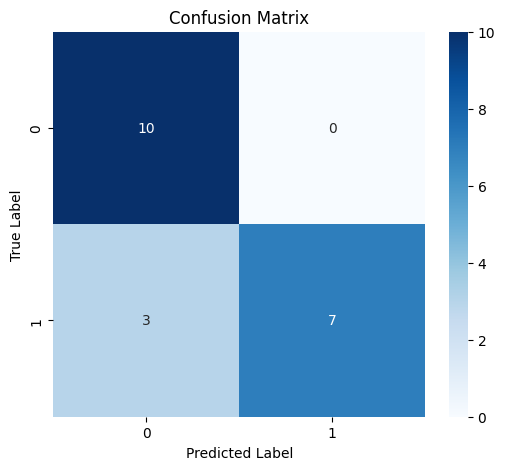

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Extract true labels and predictions
y_true = test_set_sample["label"]
y_pred = test_set_sample["pred_label"]

# Ensure both are of the same type (convert to integers or strings)
y_true = np.array(y_true, dtype=int)  # Convert to integers
y_pred = np.array(y_pred, dtype=int)  # Convert to integers

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


**Batching API Calls: Gemini API**

In [ ]:
test_set_total = test_set.sample(100)

test_set_total['pred_label'] = ''

test_set_total

,review,label,clean_reviews,pred_label
774,Sounds amazing when I can get it to connect. H...,0,Sounds amazing when can get it to connect H...,
431,"I love the firestick, but I don’t love how the...",0,love the firestick but don love how the...,
2091,I recently purchased the Fire Stick Remote Rep...,1,recently purchased the Fire Stick Remote Rep...,
2152,I’m very pleased with this item. It is everyth...,1,very pleased with this item It is everyth...,
1032,I purchased this because of its durability and...,1,purchased this because of its durability and...,
...,...,...,...,...
1669,Added an additional speaker to our home gym. O...,1,Added an additional speaker to our home gym O...,
771,So I just received this printer today and havi...,1,So just received this printer today and havi...,
2064,Doesn’t seem to be as fast charging as the one...,0,Doesn seem to be as fast charging as the one...,
2322,"I’ve purchased three of the Acer KB272 EBI 27""...",1,ve purchased three of the Acer KB272 EBI 27 ...,


In [ ]:
batches = []
batch_size = 50

for i in range(0, len(test_set_total), batch_size):
  batches.append(test_set_total[i : i + batch_size])  # Append batches instead of assigning

In [ ]:
import time

def gemini_completion_function(batch,current_batch,total_batch):
  """Function works in three steps:
  # Step-1: Convert the DataFrame to JSON using the to_json() method.
  # Step-2: Preparing the Gemini Prompt
  # Step-3: Calling Gemini API
  """

  print(f"Now processing batch#: {current_batch+1} of {total_batch}")

  json_data = batch[['clean_reviews','pred_label']].to_json(orient='records')

  prompt = f"""You are an expert linguist, who is good at classifying customer review sentiments into Positive/Negative labels.
  Help me classify customer reviews into: Positive(label=1), and Negative(label=0).
  Customer reviews are provided between three backticks below.
  In your output, only return the Json code back as output - which is provided between three backticks.
  Your task is to update predicted labels under 'pred_label' in the Json code.
  Don't make any changes to Json code format, please.
  Error handling instruction: In case a Customer Review violates API policy, please assign it default sentiment as Negative (label=0).

  ```
  {json_data}
  ```
  """

  print(prompt)
  response = model.generate_content(prompt)
  time.sleep(5)

  return response

In [ ]:
batch_count = len(batches)
responses = []

for i in range(0,len(batches)):
  responses.append(gemini_completion_function(batches[i],i,batch_count))

Now processing batch#: 1 of 2
You are an expert linguist, who is good at classifying customer review sentiments into Positive/Negative labels.
  Help me classify customer reviews into: Positive(label=1), and Negative(label=0).
  Customer reviews are provided between three backticks below.
  In your output, only return the Json code back as output - which is provided between three backticks.
  Your task is to update predicted labels under 'pred_label' in the Json code.
  Don't make any changes to Json code format, please.
  Error handling instruction: In case a Customer Review violates API policy, please assign it default sentiment as Negative (label=0).

  ```
  [{"clean_reviews":"Sounds amazing when   can get it to connect  Hardly ever connects on my Android phone ","pred_label":""},{"clean_reviews":"  love the firestick  but   don   love how they re very glitchy     have an older tv that isn   smart  so   need the stick to stream shows   And they don   last long     buy   new one eac

In [ ]:
import json
import pandas as pd
import re

df_total = pd.DataFrame()  # Initialize an empty DataFrame

for response in responses:
    try:
        # Extract potential JSON objects using regex
        json_matches = re.findall(r'\{.*?\}|\[.*?\]', response.text, re.DOTALL)

        if json_matches:
            for json_data in json_matches:  # Loop through extracted JSON chunks
                try:
                    data = json.loads(json_data)  # Parse JSON safely

                    # Convert to DataFrame (only if JSON is a list or dict)
                    if isinstance(data, list):
                        df_temp = pd.DataFrame(data)
                    elif isinstance(data, dict):
                        df_temp = pd.DataFrame([data])  # Wrap dict in a list

                    # Append to final DataFrame
                    df_total = pd.concat([df_total, df_temp], ignore_index=True)

                except json.JSONDecodeError as e:
                    print(f"Skipping invalid JSON chunk: {json_data[:50]}... Error: {e}")

        else:
            print("No valid JSON found in response.")

    except Exception as e:
        print("Unexpected error:", e)

print(df_total)  # Display the final DataFrame


                                        clean_reviews pred_label
0   Sounds amazing when   can get it to connect  H...          0
1     love the firestick  but   don   love how the...          0
2     recently purchased the Fire Stick Remote Rep...          1
3       very pleased with this item  It is everyth...          1
4     purchased this because of its durability and...          1
..                                                ...        ...
65  Rokus are arguably the most affordable and eas...          1
66  Solar recharging does not work   Looking at ot...          0
67  It was   great radio    loved it  but   starte...          0
68    was looking for something to dip my toe into...          1
69    have owned this going on 1 week now and so f...          1

[70 rows x 2 columns]


In [ ]:
import numpy as np

# Ensure 'pred_label' exists in test_set_total
test_set_total['pred_label'] = np.nan  # Initialize column

# Check the row count in both dataframes
min_rows = min(len(test_set_total), len(df_total))

# Assign values safely within available rows
test_set_total.iloc[:min_rows, test_set_total.columns.get_loc('pred_label')] = df_total['pred_label'].values[:min_rows]

# Fill remaining NaN values if needed
test_set_total['pred_label'].fillna(0, inplace=True)  # Default Negative label


<ipython-input-117-b2dd98dff846>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['0' '0' '1' '1' '1' '0' '0' '1' '0' '1' '1' '1' '1' '1' '0' '1' '0' '0'
 '0' '0' '0' '0' '0' '1' '1' '1' '0' '0' '0' '1' '0' '0' '1' '1' '1' '0'
 '1' '0' '0' '1' '0' '1' '1' '1' '0' '1' '0' '1' '0' '0' '1' '0' '1' '1'
 '0' '0' '1' '1' '1' '0' '1' '1' '1' '0' '1' '1' '0' '0' '1' '1']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_set_total.iloc[:min_rows, test_set_total.columns.get_loc('pred_label')] = df_total['pred_label'].values[:min_rows]
<ipython-input-117-b2dd98dff846>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [ ]:
print(test_set_total.columns)


Index(['review', 'label', 'clean_reviews', 'pred_label'], dtype='object')


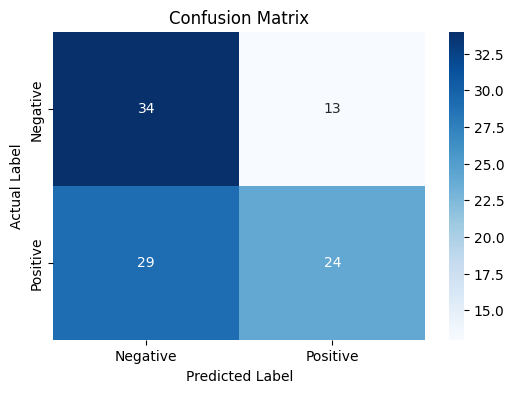

In [ ]:
# Ensure both columns are integers
y_true = test_set_total["label"].astype(int)
y_pred = test_set_total["pred_label"].astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Naive Bayes Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        71
           1       0.81      1.00      0.90       306

    accuracy                           0.81       377
   macro avg       0.41      0.50      0.45       377
weighted avg       0.66      0.81      0.73       377

SVM Model:
              precision    recall  f1-score   support

           0       0.84      0.37      0.51        71
           1       0.87      0.98      0.92       306

    accuracy                           0.87       377
   macro avg       0.85      0.67      0.72       377
weighted avg       0.86      0.87      0.85       377

Random Forest Model:
              precision    recall  f1-score   support

           0       0.54      0.10      0.17        71
           1       0.82      0.98      0.90       306

    accuracy                           0.81       377
   macro avg       0.68      0.54      0.53       377
weighted avg       0.77

<ipython-input-125-85c193ce77eb>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


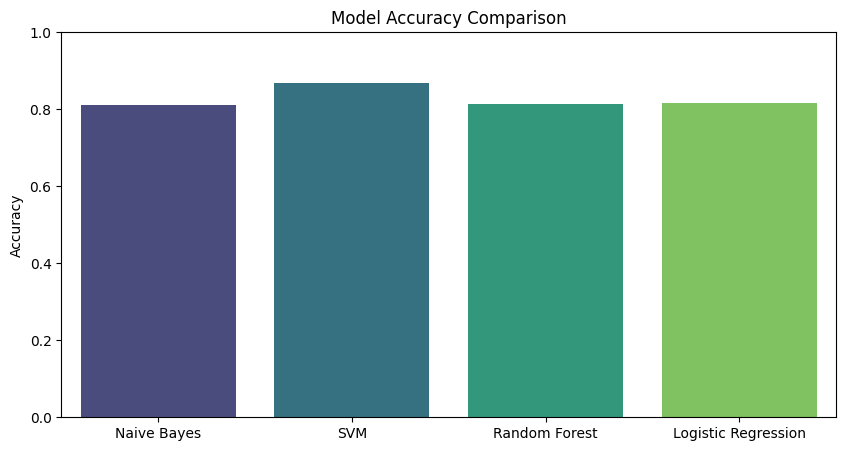

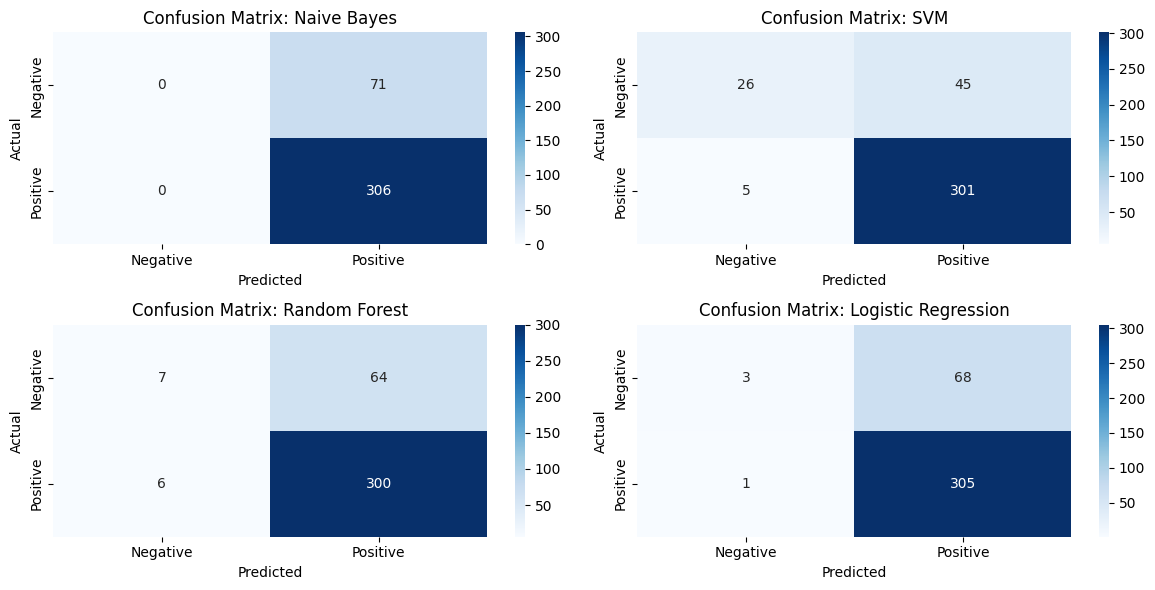

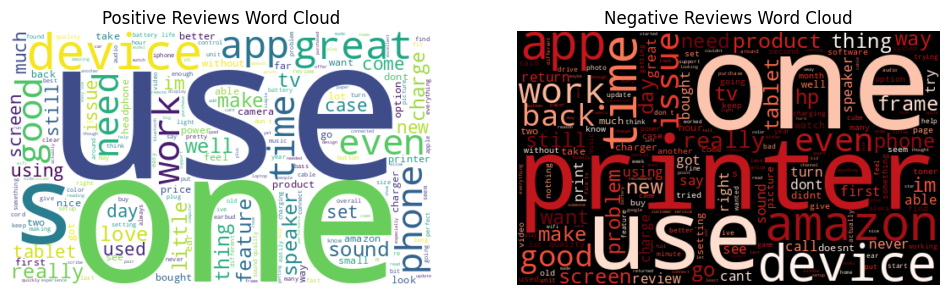

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import os



# Drop missing values in description
df = df.dropna(subset=['description'])

# Convert review_rating into binary sentiment (1: Positive, 0: Negative)
def sentiment_label(rating):
    if rating >= 4:
        return 1  # Positive
    elif rating <= 2:
        return 0  # Negative
    else:
        return None  # Neutral (optional: remove these rows)

df['sentiment'] = df['review_rating'].apply(sentiment_label)
df = df.dropna(subset=['sentiment'])  # Drop neutral reviews

# Ensure stopwords and tokenizer are available
try:
    stop_words = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    words = text.split()  # Simple tokenization
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)


df['cleaned_description'] = df['description'].astype(str).apply(preprocess_text)


# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_description'])
y = df['sentiment']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression()
}

# Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Model:\n{classification_report(y_test, y_pred)}")

# Model Performance Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Confusion Matrix
plt.figure(figsize=(12, 6))
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 2, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Word Cloud for Positive and Negative Reviews
positive_text = " ".join(df[df['sentiment'] == 1]['cleaned_description'])
negative_text = " ".join(df[df['sentiment'] == 0]['cleaned_description'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=500, height=300, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews Word Cloud")

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=500, height=300, background_color='black', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews Word Cloud")

plt.show()